In [1]:
# Install the required library
!pip install gdown

In [3]:
# Import the required module
import gdown
import shutil

# Constructing a Google Drive sharing link for file download using the file_id
file_id = '1nP2V6lTpOKoUVzORNX-V6WJ3iLADRCgk'
url = f'https://drive.google.com/uc?id={file_id}'

# Specify the destination path where you want to save the file
output = 'SIBI.zip'

# Download the file
gdown.download(url, output, quiet=False)
shutil.unpack_archive(output, "/content/dataset")


Downloading...
From: https://drive.google.com/uc?id=1nP2V6lTpOKoUVzORNX-V6WJ3iLADRCgk
To: /content/SIBI.zip
100%|██████████| 2.61G/2.61G [00:29<00:00, 89.4MB/s]


In [4]:
# Import the required module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Install the required library
!pip install mediapipe
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 41.1 MB/s eta 0:00:00


In [6]:
input_folder = "/content/dataset"

In [7]:
# Loop through files in the input folder and print the file names along with the number of files in each subfolder
for f in os.listdir(input_folder):
  print(f, len(os.listdir(os.path.join(input_folder,f))))

validation 27
train 27
test 27


In [8]:
# Define directories for training, testing, and validation datasets
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'
val_dir = '/content/dataset/validation'

In [9]:
# Configure image data generators for training sets
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=8,
                    fill_mode='nearest'
                    )

In [10]:
# Configure image data generators for validation sets
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    )


In [11]:
# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=126,
        class_mode='categorical',
        color_mode='grayscale'
        )

Found 2908 images belonging to 27 classes.


In [12]:
# Generate batches of augmented validation data
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(64, 64),
        batch_size=126,
        class_mode='categorical',
        color_mode='grayscale')

Found 503 images belonging to 27 classes.


In [13]:
# Define a convolutional neural network (CNN) model using TensorFlow Keras Sequential
model = Sequential([
    tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),

    tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),

    tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    Dense(27, activation='softmax')
])

In [14]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

In [15]:
# # Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(
      train_generator,
      epochs=15,
      batch_size=32,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_data=validation_generator,
      verbose=1,
      validation_steps=validation_generator.samples // validation_generator.batch_size,
)

Epoch 1/15
23/23 [==============================] - 87s 3s/step - loss: 3.2817 - accuracy: 0.0424 - val_loss: 3.2753 - val_accuracy: 0.0397
Epoch 2/15
23/23 [==============================] - 77s 3s/step - loss: 3.2357 - accuracy: 0.0658 - val_loss: 3.1993 - val_accuracy: 0.1455
Epoch 3/15
23/23 [==============================] - 78s 3s/step - loss: 2.7751 - accuracy: 0.2372 - val_loss: 2.0458 - val_accuracy: 0.4815
Epoch 4/15
23/23 [==============================] - 79s 3s/step - loss: 1.7688 - accuracy: 0.5014 - val_loss: 1.1496 - val_accuracy: 0.6878
Epoch 5/15
23/23 [==============================] - 83s 4s/step - loss: 1.1961 - accuracy: 0.6531 - val_loss: 0.8030 - val_accuracy: 0.7698
Epoch 6/15
23/23 [==============================] - 77s 3s/step - loss: 0.8963 - accuracy: 0.7448 - val_loss: 0.5315 - val_accuracy: 0.8545
Epoch 7/15
23/23 [==============================] - 78s 3s/step - loss: 0.6800 - accuracy: 0.8037 - val_loss: 0.4592 - val_accuracy: 0.8677
Epoch 8/15
23/23 [==

In [17]:
model.evaluate(validation_generator)

4/4 [==============================] - 13s 3s/step - loss: 0.2216 - accuracy: 0.9324


[0.2216404378414154, 0.9324055910110474]

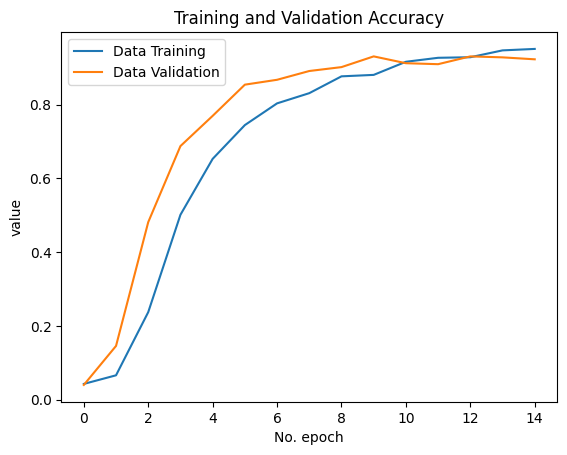

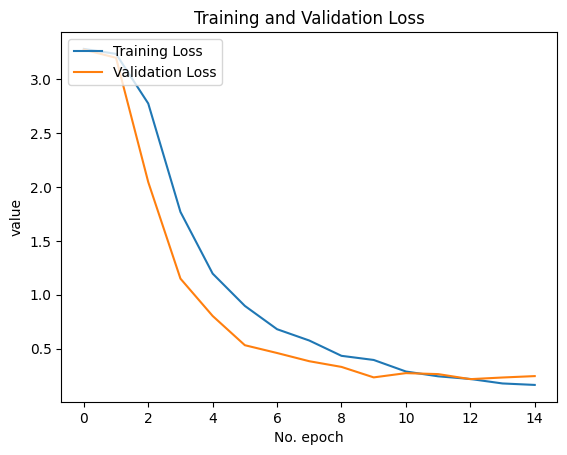

In [18]:
from matplotlib import pyplot as plt

# # Plotting the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Data Training')
plt.plot(history.history['val_accuracy'], label='Data Validation')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plotting the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [19]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

# Define the input size, number of channels, and input shape for the input image data
input_size = (64,64)
channel = (26,)
input_shape = input_size + channel

# Define a list of labels corresponding to the classes in the dataset
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
          'O','P','Q','R','S', 'Spasi', 'T','U','V','W','X','Y','Z']

In [20]:
# Define a function for image preprocessing
def preprocess(img, input_size):
    nimg = img.convert('L').resize(input_size, resample=Image.BICUBIC)
    img_arr = np.array(nimg) / 255.0
    return img_arr

# Define a function for reshaping a list of image arrays into a stacked numpy array
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [21]:
import os
from google.colab import files

# Define the name for saving the model
SAVE_MODEL_NAME = "slang_app.h5"
save_model_path = os.path.join( SAVE_MODEL_NAME)

# Save the model to the specified path without including the optimizer state
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)


Saving Model At slang_app.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from tensorflow.keras.models import load_model
# Define the path to the saved model file
MODEL_PATH = '/content/slang_app.h5'
# Load the pre-trained model from the specified path without recompiling it
model = load_model(MODEL_PATH,compile=False)

In [23]:
import os

# Get the list of categories (subdirectories) in the test directory
categories = os.listdir(test_dir)

# Initialize variables to track correct predictions and total predictions for each category
full_percentage_a = 0
full_percentage_b = 0

# Iterate through each category in the test directory
for category in categories:
        category_path = os.path.join(test_dir, category)
        print("______________________________")
        print(category)

        # Get the list of image files in the current category
        files = [f for f in os.listdir(category_path) if f.endswith('.jpg') or f.endswith('.png')]
        a = 0
        b = 0

        # Iterate through each image in the current category
        for data in files:
            imgg = Image.open(os.path.join(category_path, data))

            # Preprocess the image and reshape for model input
            X = preprocess(imgg,input_size)
            X = reshape([X])

            # Make predictions using the pre-trained model
            y = model.predict(X)

            # Print the predicted label and confidence score
            print( labels[np.argmax(y)], np.max(y) )
            if labels[np.argmax(y)] == category:
              a +=1
              b +=1
            else:
              b +=1

        print(f"percentage is: {a}/{b}")
        full_percentage_a += a
        full_percentage_b += b





______________________________
T
1/1 [==============================] - 0s 252ms/step
T 0.994905
1/1 [==============================] - 0s 16ms/step
T 0.9993691
1/1 [==============================] - 0s 16ms/step
N 0.48098668
1/1 [==============================] - 0s 16ms/step
T 0.99779284
1/1 [==============================] - 0s 16ms/step
T 0.99916756
1/1 [==============================] - 0s 17ms/step
T 0.9930019
1/1 [==============================] - 0s 17ms/step
U 0.72882795
1/1 [==============================] - 0s 16ms/step
T 0.67915034
1/1 [==============================] - 0s 15ms/step
T 0.98822266
1/1 [==============================] - 0s 16ms/step
T 0.99967575
1/1 [==============================] - 0s 16ms/step
K 0.8496638
1/1 [==============================] - 0s 16ms/step
T 0.9887839
1/1 [==============================] - 0s 16ms/step
T 0.99915516
1/1 [==============================] - 0s 24ms/step
T 0.99885976
1/1 [==============================] - 0s 21ms/step
T 0.998876

In [24]:
# Print the overall correct predictions, total predictions, and the percentage of correct predictions
print(f"{full_percentage_a}/{full_percentage_b} or {full_percentage_a/full_percentage_b}")

490/526 or 0.9315589353612167


In [ ]:
# Upload images other than dataset images to test predictions
from google.colab import files
im = files.upload()
if im:
    filename = next(iter(im))
    print("Uploaded:", filename)

In [ ]:
# preprocess input images
imgg = Image.open(filename)
X = preprocess(imgg,input_size)
X = reshape([X])

# prediction
y = model.predict(X)
print(y)
print(labels[np.argmax(y)], np.max(y), np.min(y))